In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from __future__ import annotations
import numpy as np
import optuna
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib.widgets import Slider, RangeSlider,CheckButtons
import math
from matplotlib.colors import Normalize
import matplotlib.image as mpimg
import itertools

In [2]:
# CSVファイルを読み込む
df = pd.read_csv("normalized_parameter_c_t.csv")

df_ct = pd.read_csv("parameter_c_t.csv")

In [3]:
def objective(trial: optuna.Trial) -> tuple[float, float]:
    
    p1_val = trial.suggest_float("p1", 0, 1, step=0.1)
    p2_val = trial.suggest_float("p2", 0, 1000, step=100)
    p3_val = trial.suggest_float("p3", 0, 1, step=0.1)
    p4_val = trial.suggest_float("p4", 0, 1, step=0.1)
    p5_val = trial.suggest_float("p5", 0, 1, step=0.1)
    
    f1 = df['C'][int(146410 * p1_val + 13310*p2_val/1000 + 1210 * p3_val + 110 * p4_val + 10 * p5_val)]
    f2 = df['T'][int(146410 * p1_val + 13310*p2_val/1000 + 1210 * p3_val + 110 * p4_val + 10 * p5_val)]
    return f1, f2


#sampler = optuna.samplers.TPESampler(seed=42)
optuna.logging.set_verbosity(optuna.logging.CRITICAL)
sampler = optuna.samplers.NSGAIISampler(seed=45)
study = optuna.create_study(
    directions=["minimize", "minimize"],
    sampler=sampler,
)
study.optimize(objective, n_trials=10000)

from fast_pareto import is_pareto_front2d

F = np.array([t.values for t in study.trials])

#_, ax = plt.subplots()
on_front = is_pareto_front2d(F)
pareto_sols = F[on_front]

order = np.argsort(pareto_sols[:, 0])
pareto_sols_ordered = pareto_sols[order]

<IPython.core.display.Javascript object>


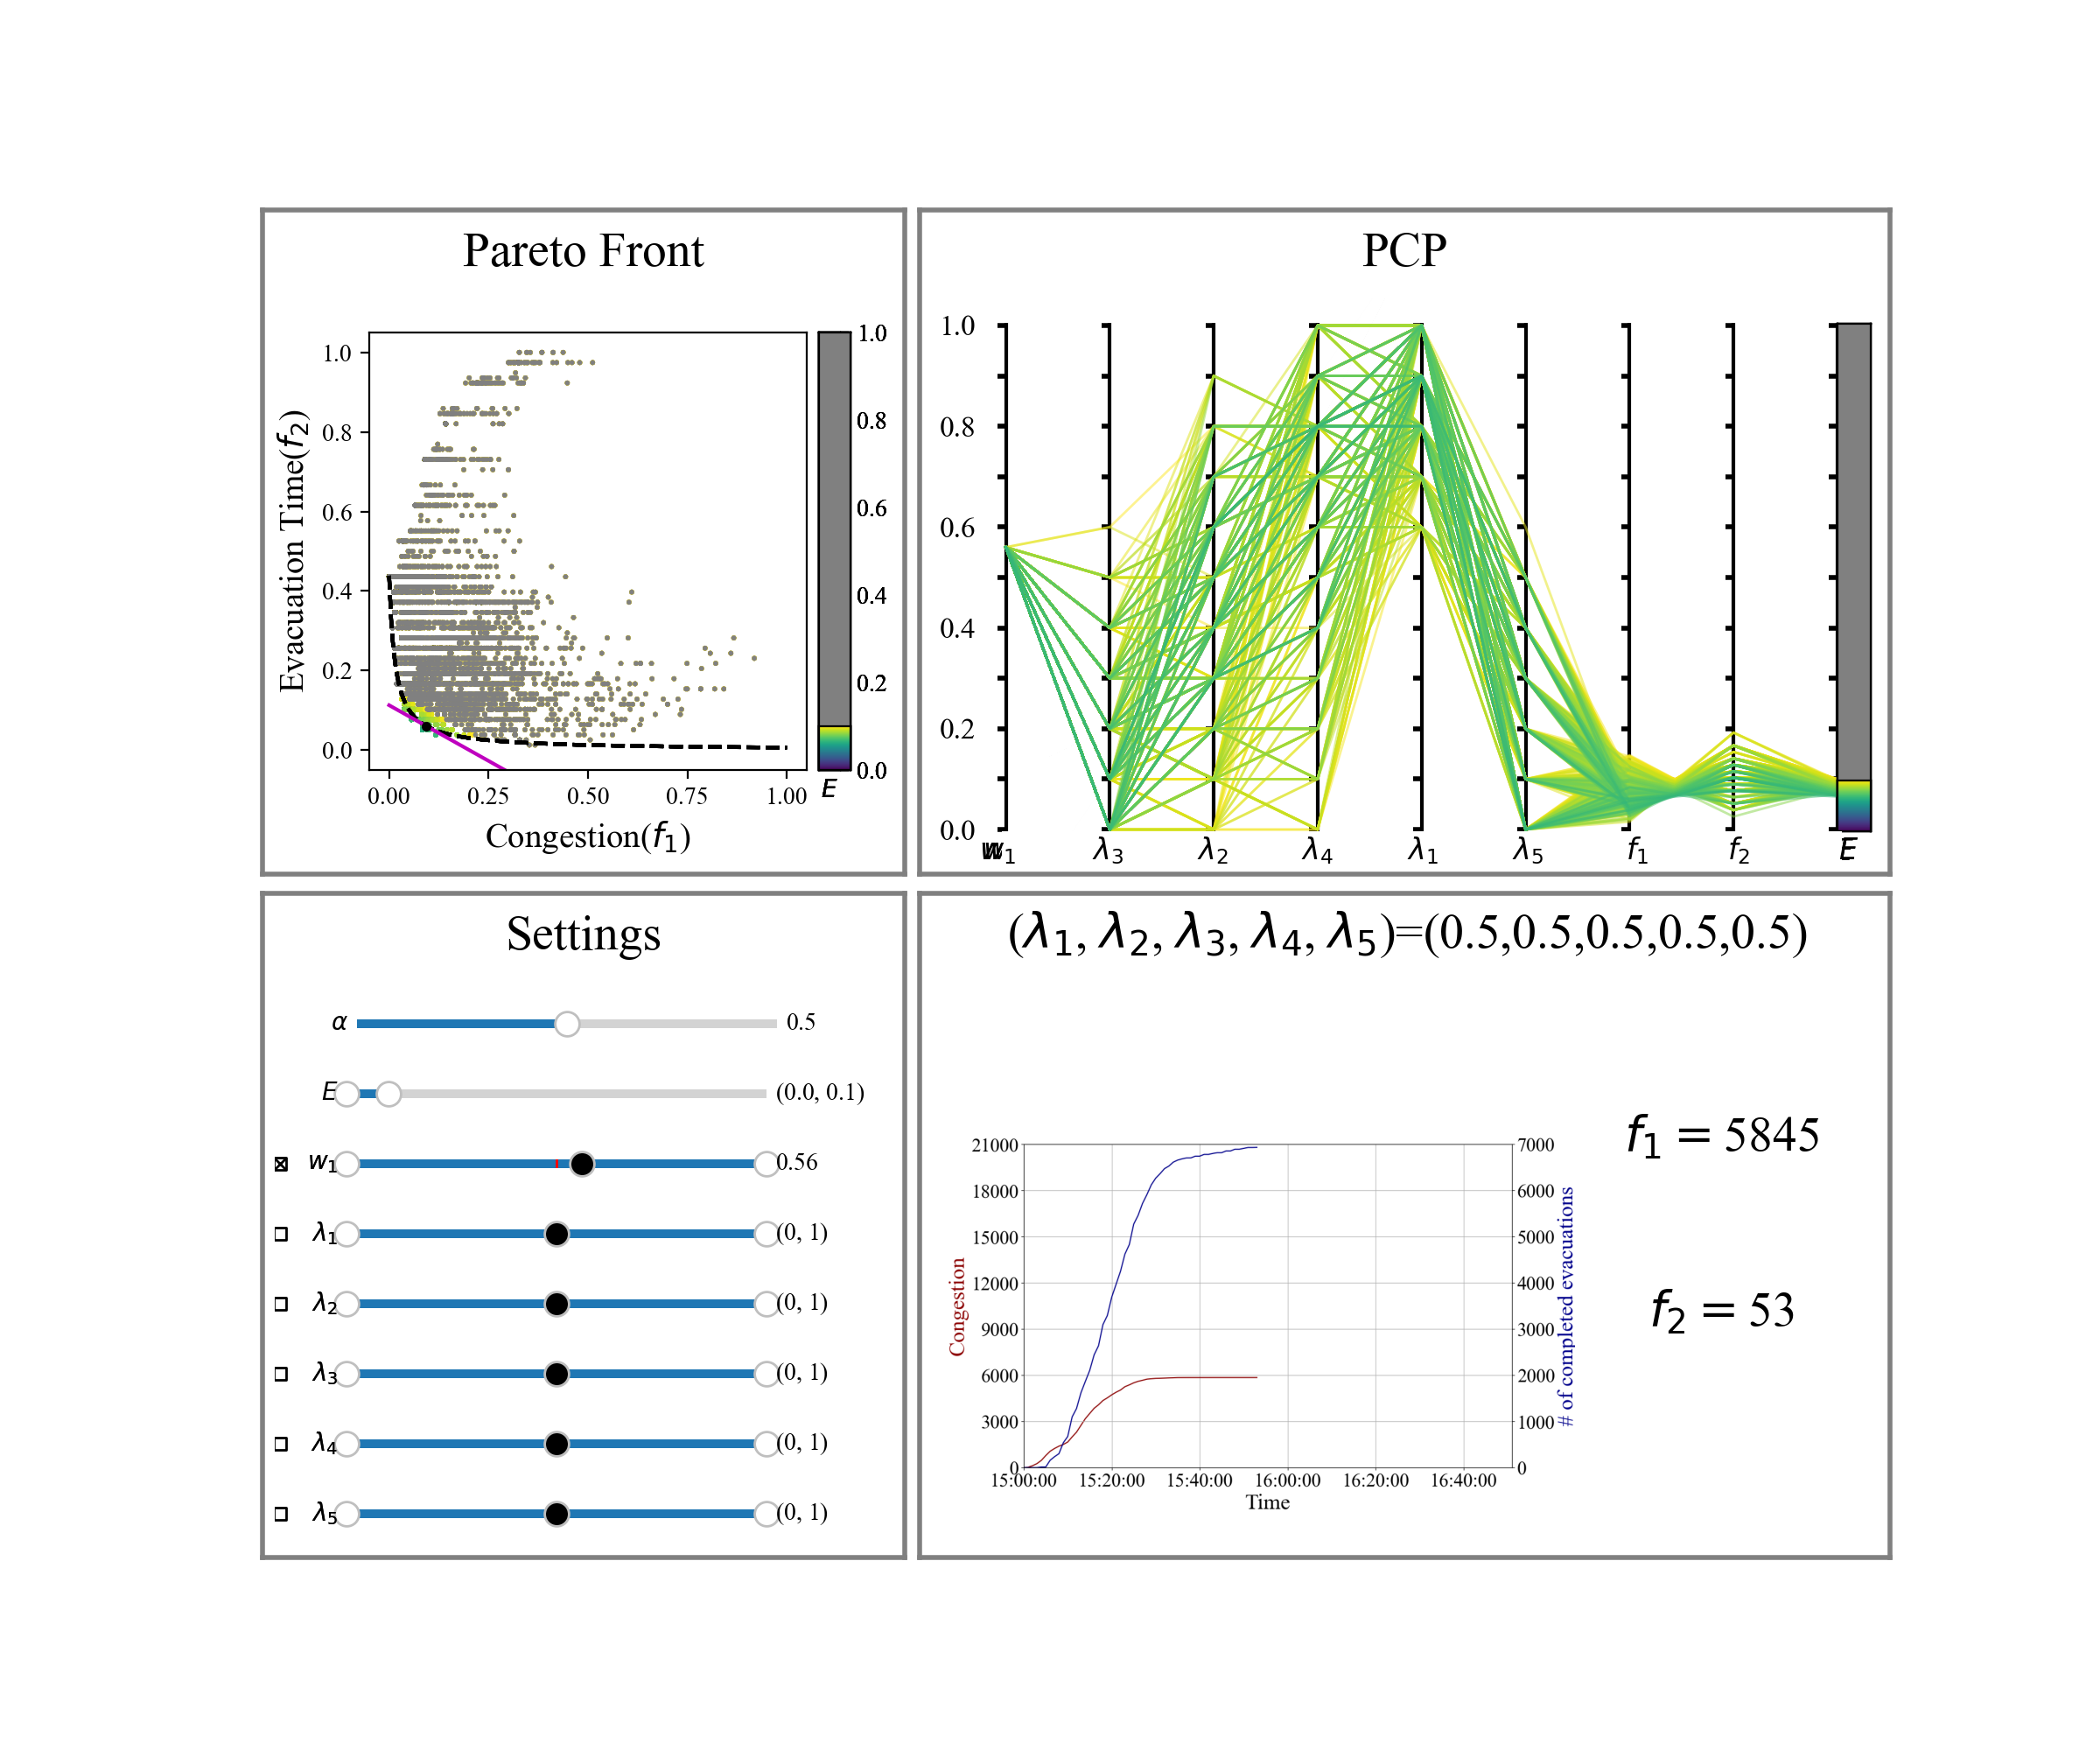

In [4]:
%matplotlib notebook

fig = plt.figure(figsize=(12, 10))

ax_1 = fig.add_subplot(2, 10, (1,4))#パレートフロント用
ax_2 = fig.add_subplot(2, 10, (5,10))#PCP用
ax_3 = fig.add_subplot(2, 10, (11,14))#スライダー用
ax_4 = fig.add_subplot(2, 10, (15, 20))#グラフ用

plt.subplots_adjust(wspace=0.1)#枠の隙間調整（横）
plt.subplots_adjust(hspace=0.03)#枠の隙間調整（縦）

# メモリを非表示にする
for ax in [ax_1, ax_2, ax_3, ax_4]:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # 軸の枠を灰色で塗りつぶす
    for spine in ax.spines.values():
        spine.set_edgecolor('gray')
        spine.set_linewidth(2)
        spine.set_facecolor('lightgray')

    
plt.rcParams['font.family'] = 'Times New Roman' 

#Settings
ax_3.text(0.5,9/10,"Settings",fontsize=20,ha="center",va="bottom")
#パラメータの初期値
# Define initial parameters
init_e_low=0.0
init_e_up=0.1

init_p0=0.5
init_p1=0.5
init_p2=0.5
init_p3=0.5
init_p4=0.5
init_p5=0.5

#透明度スライダー
alpha = fig.add_axes([0.17, 0.41, 0.2, 0.01])
alpha_slider = Slider(
    ax=alpha,
    label=r'$\alpha$',
    valmin=0,
    valmax=1.0,
    valinit=0.5,
    valstep=0.01
)

# Eのレンジスライダー
e_rangeslider_ax = fig.add_axes([0.165, 0.37, 0.2, 0.01])
e_range_slider = RangeSlider(e_rangeslider_ax, '$E$', 0, 1, valinit=[init_e_low, init_e_up],valfmt=None, valstep=0.01)
global e_range_slider_val_low
e_range_slider_val_low=0.0
global e_range_slider_val_up
e_range_slider_val_up=0.1
#重みスライダー
p0 = fig.add_axes([0.165, 0.33, 0.2, 0.01])
p0_slider = Slider(
    ax=p0,
    label='$w_1$',
    valmin=0,
    valmax=1.0,
    valinit=init_p0,
    valstep=0.01,
    handle_style = dict(facecolor='black', edgecolor='.75', size=10)
)
#重みのレンジスライダー
p0_range_slider = RangeSlider(p0, '$w_1$', 0, 1, valinit=[0, 1],valfmt=None, valstep=0.01)
p0_range_slider.set_active(False)
p0_range_slider.valtext.set_visible(False)


# λ1スライダー
p1 = fig.add_axes([0.165, 0.29, 0.2, 0.01])
p1_slider = Slider(
    ax=p1,
    label='$\lambda_1$',
    valmin=0,
    valmax=1.0,
    valinit=init_p1,
    valstep=0.1,
    handle_style = dict(facecolor='black', edgecolor='.75', size=10)
)

#λ1のレンジスライダー
p1_range_slider = RangeSlider(p1, '$\lambda_1$', 0, 1, valinit=[0, 1],valfmt=None, valstep=0.1)
p1_range_slider.set_active(False)
p1_range_slider.valtext.set_visible(False)

# λ2スライダー
p2 = fig.add_axes([0.165, 0.25, 0.2, 0.01])
p2_slider = Slider(
    ax=p2,
    label='$\lambda_2$',
    valmin=0,
    valmax=1,
    valinit=init_p2,
    valstep=0.1,
    handle_style = dict(facecolor='black', edgecolor='.75', size=10)
)

#λ2のレンジスライダー
p2_range_slider = RangeSlider(p2, '$\lambda_2$', 0, 1, valinit=[0, 1],valfmt=None, valstep=0.1)
p2_range_slider.set_active(False)
p2_range_slider.valtext.set_visible(False)

# λ3スライダー
p3 = fig.add_axes([0.165, 0.21, 0.2, 0.01])
p3_slider = Slider(
    ax=p3,
    label='$\lambda_3$',
    valmin=0.0,
    valmax=1.0,
    valinit=init_p3,
    valstep=0.1,
    handle_style = dict(facecolor='black', edgecolor='.75', size=10)
)
#λ3のレンジスライダー
p3_range_slider = RangeSlider(p3, '$\lambda_3$', 0, 1, valinit=[0, 1],valfmt=None, valstep=0.1)
p3_range_slider.set_active(False)
p3_range_slider.valtext.set_visible(False)

# λ4スライダー
p4 = fig.add_axes([0.165, 0.17, 0.2, 0.01])
p4_slider = Slider(
    ax=p4,
    label='$\lambda_4$', 
    valmin=0.0,
    valmax=1.0,
    valinit=init_p4,
    valstep=0.1,
    handle_style = dict(facecolor='black', edgecolor='.75', size=10)
)
#λ4のレンジスライダー
p4_range_slider = RangeSlider(p4, '$\lambda_4$', 0, 1, valinit=[0, 1],valfmt=None, valstep=0.1)
p4_range_slider.set_active(False)
p4_range_slider.valtext.set_visible(False)

# λ5スライダー
p5 = fig.add_axes([0.165, 0.13, 0.2, 0.01])
p5_slider = Slider(
    ax=p5,
    label='$\lambda_5$',
    valmin=0.0,
    valmax=1.0,
    valinit=init_p5,
    valstep=0.1,
    handle_style = dict(facecolor='black', edgecolor='.75', size=10)
)
#λ5のレンジスライダー
p5_range_slider = RangeSlider(p5, '$\lambda_5$', 0, 1, valinit=[0, 1],valfmt=None, valstep=0.1)
p5_range_slider.set_active(False)
p5_range_slider.valtext.set_visible(False)

#チェックボタン
p0_check= fig.add_axes([0.131, 0.315, 0.0155, 0.04])
p0_check.spines['left'].set_visible(False)
p0_check.spines['right'].set_visible(False)
p0_check.spines['top'].set_visible(False)
p0_check.spines['bottom'].set_visible(False)
check_labels=[""]
p0_check_label=[True]
plot_p0_button = CheckButtons(p0_check, check_labels, p0_check_label)

p1_check= fig.add_axes([0.131, 0.275, 0.0155, 0.04])
p1_check.spines['left'].set_visible(False)
p1_check.spines['right'].set_visible(False)
p1_check.spines['top'].set_visible(False)
p1_check.spines['bottom'].set_visible(False)
check_labels=[""]
p1_check_label=[False]
plot_p1_button = CheckButtons(p1_check, check_labels, p1_check_label)

p2_check= fig.add_axes([0.131, 0.235, 0.0155, 0.04])
p2_check.spines['left'].set_visible(False)
p2_check.spines['right'].set_visible(False)
p2_check.spines['top'].set_visible(False)
p2_check.spines['bottom'].set_visible(False)
check_labels=[""]
p2_check_label=[False]
plot_p2_button = CheckButtons(p2_check, check_labels, p2_check_label)

p3_check= fig.add_axes([0.131, 0.195, 0.0155, 0.04])
p3_check.spines['left'].set_visible(False)
p3_check.spines['right'].set_visible(False)
p3_check.spines['top'].set_visible(False)
p3_check.spines['bottom'].set_visible(False)
check_labels=[""]
p3_check_label=[False]
plot_p3_button = CheckButtons(p3_check, check_labels, p3_check_label)

p4_check= fig.add_axes([0.131, 0.155, 0.0155, 0.04])
p4_check.spines['left'].set_visible(False)
p4_check.spines['right'].set_visible(False)
p4_check.spines['top'].set_visible(False)
p4_check.spines['bottom'].set_visible(False)
check_labels=[""]
p4_check_label=[False]
plot_p4_button = CheckButtons(p4_check, check_labels, p4_check_label)

p5_check= fig.add_axes([0.131, 0.115, 0.0155, 0.04])
p5_check.spines['left'].set_visible(False)
p5_check.spines['right'].set_visible(False)
p5_check.spines['top'].set_visible(False)
p5_check.spines['bottom'].set_visible(False)
check_labels=[""]
p5_check_label=[False]
plot_p5_button = CheckButtons(p5_check, check_labels, p5_check_label)



#PCP
ax_2.text(0.5,9/10,"PCP",fontsize=20,ha="center",va="bottom")
ax_2_1 = fig.add_axes([0.455, 0.51, 0.44, 0.32])#PCP描画用axesを用意
#枠を消す
ax_2_1.spines['right'].set_visible(False)
ax_2_1.spines['top'].set_visible(False)
ax_2_1.spines['left'].set_visible(False)
ax_2_1.spines['bottom'].set_visible(False)
#メモリを消す
ax_2_1.xaxis.set_visible(False)
ax_2_1.yaxis.set_visible(False)

#PCPの軸作成
vline = np.linspace(0, 1, 9)
hline = np.linspace(0, 1, 11)  # 0.1から0.85を11等分
pcp_labels = [r'$w_{1}$ ',r'$\lambda_{1}$',r'$\lambda_{2}$',r'$\lambda_{3}$',r'$\lambda_{4}$',r'$\lambda_{5}$',r'$f_1$',r'$f_2$ ',r'$E$ ']
for i, value_1 in enumerate(vline):
    ax_2_1.vlines(value_1, -0.005, 1.005, color="black")#直線
    ax_2_1.text(value_1+0.02, -0.06, pcp_labels[i], ha='right', fontsize=12)#軸のタイトル
    for value_2 in hline:
        ax_2_1.hlines(value_2, xmin=value_1 - 0.01, xmax=value_1 - 0.001, color="black", lw=2)#メモリ
hline_5 = np.linspace(0, 1, 6) 
pcp_memori = ['0.0','0.2','0.4','0.6','0.8','1.0']
for i,value_3 in enumerate(hline_5):
        ax_2_1.text(-0.08, value_3+0.02, pcp_memori[i],va='top', ha='left', fontsize=12)#メモリの数字
#Eの軸の横のカラーバー
bar_gray = fig.add_axes([0.875, 0.525, 0.016, 0.29])
bar_gray.set_facecolor('gray')  # 背景色を灰色に設定
bar_gray.spines['bottom'].set_visible(False) 
bar_gray.set_xticks([])  # x軸のメモリを非表示
bar_gray.set_yticks([])

bar = fig.add_axes([0.875, 0.525+e_range_slider_val_low*0.29, 0.016, 0.29*(e_range_slider_val_up-e_range_slider_val_low)])
norm = mpl.colors.Normalize(vmin=0, vmax=1.0)
mpl.colorbar.ColorbarBase(bar, cmap="viridis", norm=norm, orientation="vertical")
bar.tick_params(size=0)
bar.set_yticklabels([])        
bar.spines['top'].set_visible(False)


#入力から、プロットするために必要なリストを返す関数
def generate_combinations(p0=None,p1=None, p2=None, p3=None, p4=None, p5=None,e_lower=None,e_upper=None,p0_lower=None,p0_upper=None,p1_lower=None,p1_upper=None,p2_lower=None,p2_upper=None,p3_lower=None,p3_upper=None,p4_lower=None,p4_upper=None,p5_lower=None,p5_upper=None,p0_checkbox=None,p1_checkbox=None,p2_checkbox=None,p3_checkbox=None,p4_checkbox=None,p5_checkbox=None):

    p0_range = [p0] if p0_checkbox is not False else [round(val, 1) for val in np.arange(0, 1.1, 0.1)]
    p1_range = [p1] if p1_checkbox is not False else [round(val, 1) for val in np.arange(0, 1.1, 0.1)]
    p2_range = [p2] if p2_checkbox is not False else [round(val, 1) for val in np.arange(0, 1.1, 0.1)]
    p3_range = [p3] if p3_checkbox is not False else [round(val, 1) for val in np.arange(0, 1.1, 0.1)]
    p4_range = [p4] if p4_checkbox is not False else [round(val, 1) for val in np.arange(0, 1.1, 0.1)]
    p5_range = [p5] if p5_checkbox is not False else [round(val, 1) for val in np.arange(0, 1.1, 0.1)]
    
    combinations = []
    combinations_for_variance=[]
    
    for p0_val in p0_range:
        if p0_lower <= p0_val <= p0_upper:
            for p1_val in p1_range:
                if p1_lower <= p1_val <= p1_upper:
                    for p2_val in p2_range:
                        if p2_lower <= p2_val <= p2_upper:
                            for p3_val in p3_range:
                                if p3_lower <= p3_val <= p3_upper:
                                    for p4_val in p4_range:
                                        if p4_lower <= p4_val <= p4_upper:
                                            for p5_val in p5_range:
                                                if p5_lower <= p5_val <= p5_upper:
                                                    f1_val = df['C'][int(146410 * (p2_val) + 13310 * (p1_val) + 1210 * (p3_val) + 110 * (p4_val) + 10 * (p5_val))]
                                                    f2_val = df['T'][int(146410 * (p2_val) + 13310 * (p1_val) + 1210 * (p3_val) + 110 * (p4_val) + 10 * (p5_val))]
                                                    E_val = f1_val * p0_val + f2_val * (1 - p0_val)
                                                    #combinations_for_variance.append([p0_val, p1_val, p2_val, p3_val, p4_val, p5_val, E_val])
                                                    if e_lower <= E_val <= e_upper:
                                                        combinations.append([p0_val, p1_val, p2_val, p3_val, p4_val, p5_val, f1_val, f2_val, E_val])
    
    #combinations.sort(key=lambda x: x[-1])
    combinations.sort(key=lambda x: x[-1], reverse=True)

    
    return combinations

#入力から、プロットするために必要なリストを返す関数
def generate_combinations_for_sort_axes(p0=None,p1=None, p2=None, p3=None, p4=None, p5=None,e_lower=None,e_upper=None,p0_lower=None,p0_upper=None,p1_lower=None,p1_upper=None,p2_lower=None,p2_upper=None,p3_lower=None,p3_upper=None,p4_lower=None,p4_upper=None,p5_lower=None,p5_upper=None):

    p0_range = [round(val, 1) for val in np.arange(0, 1.1, 0.1)]
    p1_range = [round(val, 1) for val in np.arange(0, 1.1, 0.1)]
    p2_range = [round(val, 1) for val in np.arange(0, 1.1, 0.1)]
    p3_range = [round(val, 1) for val in np.arange(0, 1.1, 0.1)]
    p4_range = [round(val, 1) for val in np.arange(0, 1.1, 0.1)]
    p5_range = [round(val, 1) for val in np.arange(0, 1.1, 0.1)]
    
    combinations = []
    combinations_for_sort_axes=[]
    
    for p0_val in p0_range:
        combinations = []
        if p0_lower <= p0_val <= p0_upper:
            for p1_val in p1_range:
                if p1_lower <= p1_val <= p1_upper:
                    for p2_val in p2_range:
                        if p2_lower <= p2_val <= p2_upper:
                            for p3_val in p3_range:
                                if p3_lower <= p3_val <= p3_upper:
                                    for p4_val in p4_range:
                                        if p4_lower <= p4_val <= p4_upper:
                                            for p5_val in p5_range:
                                                if p5_lower <= p5_val <= p5_upper:
                                                    f1_val = df['C'][int(146410 * (p2_val) + 13310 * (p1_val) + 1210 * (p3_val) + 110 * (p4_val) + 10 * (p5_val))]
                                                    f2_val = df['T'][int(146410 * (p2_val) + 13310 * (p1_val) + 1210 * (p3_val) + 110 * (p4_val) + 10 * (p5_val))]
                                                    E_val = f1_val * p0_val + f2_val * (1 - p0_val)
                                                    #combinations_for_variance.append([p0_val, p1_val, p2_val, p3_val, p4_val, p5_val, E_val])
                                                    if e_lower <= E_val <= e_upper:
                                                        combinations.append([p0_val, p1_val, p2_val, p3_val, p4_val, p5_val, f1_val, f2_val, E_val])
        combinations.sort(key=lambda x: x[-1], reverse=True)
        if combinations!=[]:
            combinations_for_sort_axes.append(combinations)

    return combinations_for_sort_axes

def generate_axes_order(combinations_for_sort_axes):
    combinations_for_sort_axes_new = [x for x in combinations_for_sort_axes if len(x) != 1]#要素数が1だったら消す
    distance_matrix_list=[]
    for w in range(len(combinations_for_sort_axes_new)):#距離行列を計算
        extracted_dimensions = [sublist[1:6] for sublist in combinations_for_sort_axes_new[w]]#パラメータを取り出す
        data_array = np.array(extracted_dimensions)
        correlation_matrix = np.corrcoef(data_array, rowvar=False)#相関行列の計算
        if not np.isnan(correlation_matrix).any():
            distance_matrix = 1 - np.abs(correlation_matrix)#相関が強いほど遠いように距離行列を定義
            distance_matrix_list.append(distance_matrix)
    def calculate_traveling_distance(order,distance_matrix) -> float:#経路を入力したら距離を返す関数
        total_distance =0.0
        cur = order[0]
        for i in range(len(order)-1):
            next=order[i+1]
            total_distance+=distance_matrix[cur,next]
            cur=next
        return total_distance
    perm=itertools.permutations(range(5))
    min_distance=float("inf")
    min_variance=float("inf")
    variance=float("inf")
    i=0
    combinations_for_sort_axes_new = [x for x in combinations_for_sort_axes if len(x) != 1]
    for perm in itertools.permutations(range(5)):#最短経路とその距離を求める
        distance_list=[]
        for w in range(len(distance_matrix_list)):
            distance=calculate_traveling_distance(perm,distance_matrix_list[w])#その経路の時の距離を求める
            distance_list.append(distance)

        if np.isnan(distance_list).any():
            print("distance_listにNaNが含まれています。NaNを削除します。")
            distance_list = distance_list[~np.isnan(distance_list)]
        variance = np.var(distance_list)#その経路のときの全ての重みの時の距離に対して分散を計算
        if min_variance>variance and variance!="nan":
            min_variance=variance
            optimal_order=perm
            
    return optimal_order



#描画する線のリストを受け取ったらpcpを描画する関数    
def plot_pcp(pcp_list,p0=None,p1=None, p2=None, p3=None, p4=None, p5=None,e_lower=None,e_upper=None,alpha_val=0.5):
    global lines

    lines=[]
    pcp_t=np.linspace(0, 1, 9)
    for pcp in pcp_list:
        line,=ax_2_1.plot(pcp_t,pcp,lw=1,color=(np.where(pcp[8] >= e_lower and pcp[8] <= e_upper, cmap(pcp[8]/(e_upper-e_lower)),0.5)), alpha=alpha_val)
        lines.append(line)  # 線オブジェクトをリストに追加
        
    f1_val = df['C'][int(146410 * (p2) + 13310*(p1) + 1210 * (p3) + 110 *(p4) + 10 *(p5))]
    f2_val = df['T'][int(146410 * (p2) + 13310*(p1) + 1210 * (p3) + 110 *(p4) + 10 *(p5))]
    E_val=f1_val*p0+f2_val*(1-p0)   
    
    #Eの軸の横のカラーバー
    bar_gray = fig.add_axes([0.875, 0.525, 0.016, 0.29])
    bar_gray.set_facecolor('gray')  # 背景色を灰色に設定
    bar_gray.spines['bottom'].set_visible(False) 
    bar_gray.set_xticks([])  # x軸のメモリを非表示
    bar_gray.set_yticks([])

    bar = fig.add_axes([0.875, 0.525+e_range_slider_val_low*0.29, 0.016, 0.29*(e_range_slider_val_up-e_range_slider_val_low)])
    norm = mpl.colors.Normalize(vmin=0, vmax=1.0)
    mpl.colorbar.ColorbarBase(bar, cmap="viridis", norm=norm, orientation="vertical")
    bar.tick_params(size=0)
    bar.set_yticklabels([])        
    bar.spines['top'].set_visible(False)

    #スライダーで指定したグラフ用のパラメタセットの線
    #line,=ax_2_1.plot(pcp_t,[p0,p1,p2,p3,p4,p5,f1_val,f2_val,E_val],lw=2,color=(np.where(E_val <= 0.2, cmap(E_val/0.2),0.5)), alpha=1.0,zorder=200000)
    #lines.append(line)   

#描画する線のリストと軸の順番を受け取ったらpcpを描画する関数    
def plot_ordered_pcp(pcp_list,best_tour,p0=None,p1=None,p2=None,p3=None,p4=None,p5=None,e_lower=None,e_upper=None,alpha_val=0.5):
    #orderに1足して089追加
    #pcp_listを並び替えてから描画する！
    
    # すべての要素に1を加える
    result_list = [x + 1 for x in best_tour]
    # 一番最初に0を追加
    result_list.insert(0, 0)
    # 一番最後に6, 7, 8を追加
    result_list.extend([6, 7, 8])
    
    sorted_pcp_list = [[row[i] for i in result_list] for row in pcp_list]

    
    pcp_labels = [r'$w_{1}$ ',r'$\lambda_{1}$',r'$\lambda_{2}$',r'$\lambda_{3}$',r'$\lambda_{4}$',r'$\lambda_{5}$',r'$f_1$',r'$f_2$ ',r'$E$ ']
    pcp_labels_ordered = [pcp_labels[i] for i in result_list]

    global lines
    for line in lines:
        line.remove()
    lines=[]
    
    
    pcp_t=np.linspace(0, 1, 9)
    for pcp in sorted_pcp_list:
        line,=ax_2_1.plot(pcp_t,pcp,lw=1,color=(np.where(pcp[8] >= e_lower and pcp[8] <= e_upper, cmap(pcp[8]/(e_upper-e_lower)),0.5)), alpha=alpha_val)
        lines.append(line)  # 線オブジェクトをリストに追加
        
    f1_val = df['C'][int(146410 * (p2) + 13310*(p1) + 1210 * (p3) + 110 *(p4) + 10 *(p5))]
    f2_val = df['T'][int(146410 * (p2) + 13310*(p1) + 1210 * (p3) + 110 *(p4) + 10 *(p5))]
    E_val=f1_val*p0+f2_val*(1-p0)   
    
    #Eの軸の横のカラーバー
    bar_gray = fig.add_axes([0.875, 0.525, 0.016, 0.29])
    bar_gray.set_facecolor('gray')  # 背景色を灰色に設定
    bar_gray.spines['bottom'].set_visible(False) 
    bar_gray.set_xticks([])  # x軸のメモリを非表示
    bar_gray.set_yticks([])

    bar = fig.add_axes([0.875, 0.525+e_range_slider_val_low*0.29, 0.016, 0.29*(e_range_slider_val_up-e_range_slider_val_low)])
    norm = mpl.colors.Normalize(vmin=0, vmax=1.0)
    mpl.colorbar.ColorbarBase(bar, cmap="viridis", norm=norm, orientation="vertical")
    bar.tick_params(size=0)
    bar.set_yticklabels([])        
    bar.spines['top'].set_visible(False)
    
    ax_2_1_new = fig.add_axes([0.477, 0.505, 0.4, 0.02])
    #枠を消す
    ax_2_1_new.spines['right'].set_visible(False)
    ax_2_1_new.spines['top'].set_visible(False)
    ax_2_1_new.spines['left'].set_visible(False)
    ax_2_1_new.spines['bottom'].set_visible(False)
    #メモリを消す
    ax_2_1_new.xaxis.set_visible(False)
    ax_2_1_new.yaxis.set_visible(False)
    for i, value_1 in enumerate(vline):
        ax_2_1_new.text(value_1+0.02, 0.2, pcp_labels_ordered[i], ha='right', fontsize=12)#軸のタイトル

    a_fit,b_fit=draw_pareto_and_curve()
    tangentline_x=(math.sqrt(abs((-1*a_fit/p0))))-b_fit
    tangentline(tangentline_x,None)
    plot_e_line(e_lower)
    plot_e_line(e_upper)
    


def plot_e_line(e_lower_or_upper=None):
    
    if e_lower_or_upper<=0.1:
        e_lower_or_upper_line=bar.axhline(e_lower_or_upper*10, color='k')
    else:
        e_lower_or_upper_line=bar_gray.axhline((e_lower_or_upper-0.1)*10/9, color='k')
    lines.append(e_lower_or_upper_line)
    

#分散のヒートマップを作る関数
def make_variance_heatmap(variance_list):
    y_values = np.arange(0, 1.001, 0.001)
    y_values = np.flip(y_values)
    #variance_list = [0.0 if np.isnan(x) else x for x in variance_list]
    #np.nan_to_num(variance_list, nan=0.0)
    max_value = max(max(row) for row in np.nan_to_num(variance_list, nan=0.0))
    
    p1_data=variance_list[0]
    p1_gradient_data = np.interp(y_values, [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], p1_data).reshape(-1, 1)
    # Create a normalization instance to map the values to the range [0, 1]
    #norm = colors.Normalize(vmin=0, vmax=1)

    p1_bar = fig.add_axes([0.529, 0.525, 0.004, 0.29])
    # グラデーションの描画
    p1_bar.imshow(p1_gradient_data, cmap='Greys', norm=Normalize(vmin=0, vmax=max_value) ,aspect='auto')
    p1_bar.tick_params(size=0)
    p1_bar.set_yticklabels([])
    p1_bar.set_xticklabels([])
        
        
    p2_data=variance_list[1]
    p2_gradient_data = np.interp(y_values, [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], p2_data).reshape(-1, 1)
    p2_bar = fig.add_axes([0.578, 0.525, 0.004, 0.29])
    # グラデーションの描画
    p2_bar.imshow(p2_gradient_data, cmap='Greys', norm=Normalize(vmin=0, vmax=max_value), aspect='auto')
    p2_bar.tick_params(size=0)
    p2_bar.set_yticklabels([])
    p2_bar.set_xticklabels([])
    
    p3_data=variance_list[2]
    p3_gradient_data = np.interp(y_values, [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], p3_data).reshape(-1, 1)
    p3_bar = fig.add_axes([0.627, 0.525, 0.004, 0.29])
    # グラデーションの描画
    p3_bar.imshow(p3_gradient_data, cmap='Greys', norm=Normalize(vmin=0, vmax=max_value), aspect='auto')
    p3_bar.tick_params(size=0)
    p3_bar.set_yticklabels([])
    p3_bar.set_xticklabels([])
    
    p4_data=variance_list[3]
    p4_gradient_data = np.interp(y_values, [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], p4_data).reshape(-1, 1)
    # Create a normalization instance to map the values to the range [0, 1]
    #norm = colors.Normalize(vmin=0, vmax=1)
    p4_bar = fig.add_axes([0.676, 0.525, 0.004, 0.29])
    # グラデーションの描画
    p4_bar.imshow(p4_gradient_data, cmap='Greys', norm=Normalize(vmin=0, vmax=max_value), aspect='auto')
    p4_bar.tick_params(size=0)
    p4_bar.set_yticklabels([])
    p4_bar.set_xticklabels([])
    
    p5_data=variance_list[4]
    p5_gradient_data = np.interp(y_values, [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], p5_data).reshape(-1, 1)
    # Create a normalization instance to map the values to the range [0, 1]
    #norm = colors.Normalize(vmin=0, vmax=1)
    p5_bar = fig.add_axes([0.725, 0.525, 0.004, 0.29])
    # グラデーションの描画
    p5_bar.imshow(p5_gradient_data, cmap='Greys', norm=Normalize(vmin=0, vmax=max_value), aspect='auto')
    p5_bar.tick_params(size=0)
    p5_bar.set_yticklabels([])
    p5_bar.set_xticklabels([])
    
#Pareto Front
ax_1.text(0.5,9/10,"Pareto Front",fontsize=20,ha="center",va="bottom")
ax_1_1 = fig.add_axes([0.155, 0.56, 0.25, 0.25])
#cmap=plt.get_cmap("jet")
cmap=plt.get_cmap("viridis")


# データからxおよびyを取り出す
x_data = pareto_sols_ordered[:, 0]
y_data = pareto_sols_ordered[:, 1]

#fig, ax = plt.subplots()

global line
line=[]
global click
click=[]
def draw_pareto_and_curve():
    # 双曲線の関数
    def hyperbolic_curve(x, a, b):
        return a / (x + b)

    # フィッティングの実行
    params, covariance = curve_fit(hyperbolic_curve, x_data, y_data, p0=(1, 0.5))  # 初期値を指定

    # フィッティングされたパラメータ
    a_fit, b_fit = params

    x_fit = np.linspace(0.0, 1.0, 200)  # 0から0.25まで0.01刻みで生成

    # フィッティングされた関数
    y_fit = hyperbolic_curve(x_fit, a_fit, b_fit)

    ax_1_1.plot(x_fit, y_fit, color='black', linestyle='--')

    # 軸の範囲を指定
    ax_1_1.set_xlim([-0.05, 1.05])
    ax_1_1.set_ylim([-0.05, 1.05])

    ax_1_1.set_xlabel('Congestion('+r'$f_1$'+')', fontsize=14)
    ax_1_1.set_ylabel('Evacuation Time('+r'$f_2$'+')', fontsize=14)
    ax_1_1.set_aspect("equal")


    return a_fit,b_fit

def tangentline(tx,tw=None):
    global line
    global w
    global click
    a_fit,b_fit=draw_pareto_and_curve()
    
    slope=-a_fit/(tx+b_fit)**2
    w=slope/(slope-1)#接線から求めた重み FからE配列求める　スキャター
    
    E=F[:, 0]*w+F[:, 1]*(1-w)


    sc=ax_1_1.scatter(F[:, 0], F[:, 1], s=1, c=E,cmap=cmap, vmin=e_range_slider_val_low, vmax=e_range_slider_val_up)#sはマーカーの大きさ
    
    # Eが0.2以上の場合は"gray"で塗りつぶし、0.2以下の場合は塗らない
    sc = ax_1_1.scatter(F[:, 0], F[:, 1], s=1, c=np.where(E > e_range_slider_val_up, "gray", "none"))
    # Eが0.2以上の場合は"gray"で塗りつぶし、0.2以下の場合は塗らない
    sc = ax_1_1.scatter(F[:, 0], F[:, 1], s=1, c=np.where(E < e_range_slider_val_low, "gray", "none"))

    
    
    x_grid = np.linspace(0, 1, 300)
    ty=a_fit/(tx+b_fit)
    
    
    for line in line:
        line.remove()
    line=ax_1_1.plot(x_grid,slope*(x_grid-tx)+ty,color='m')
    
    
    
    for click in click:
        click.remove()
    
    click=ax_1_1.plot(tx,ty,marker='.',color='black')

    # カラーバーを追加
    cax = fig.add_axes((0.39, 0.56, 0.01, 0.25))
    
    cbar = plt.colorbar(sc,  orientation='vertical',cax=cax)
    # Set the label for the colorbar
    cbar.ax.set_xlabel(r'$E$', fontsize=10)
    
    #Eの軸の横のカラーバー
    bar2_gray = fig.add_axes([0.39, 0.56, 0.015, 0.25])
    bar2_gray.set_facecolor('gray')  # 背景色を灰色に設定
    bar2_gray.spines['bottom'].set_visible(False) 
    bar2_gray.set_xticks([])  # x軸のメモリを非表示
    bar2_gray.set_yticks([])
    
    bar2 = fig.add_axes([0.39, 0.56+e_range_slider_val_low*0.25, 0.015, 0.25*(e_range_slider_val_up-e_range_slider_val_low)])
    norm = mpl.colors.Normalize(vmin=0, vmax=1)
    mpl.colorbar.ColorbarBase(bar2, cmap="viridis", norm=norm, orientation="vertical")
    bar2.tick_params(size=0)
    bar2.set_yticklabels([])        
    bar2.spines['top'].set_visible(False)


    
    
    #p0_slider.set_val(round(w,2))
    return w
    
#fig.canvas.mpl_connect('button_press_event',on_click)


#グラフ
def show_graph(img_path):
    graph = fig.add_axes([0.45, 0.03, 0.3, 0.45])
    # 軸を非表示にする
    graph.axis('off')
    graph.set_xticks([])  # x軸のメモリを非表示
    graph.set_yticks([])  # y軸のメモリを非表示
    img = mpimg.imread(img_path)
    graph.imshow(img)
    
def show_c_t(p1,p2,p3,p4,p5):
    show_c_t = fig.add_axes([0.75, 0.15, 0.14, 0.3])
    
    show_parameter = fig.add_axes([0.45, 0.435, 0.44, 0.05])
    #show_c_t.axis('off')
    show_c_t.set_xticks([])  # x軸のメモリを非表示
    show_c_t.set_yticks([])  # y軸のメモリを非表示
    show_parameter.set_xticks([])  # x軸のメモリを非表示
    show_parameter.set_yticks([])  # y軸のメモリを非表示
    
    show_c_t.spines['top'].set_visible(False)
    show_c_t.spines['right'].set_visible(False)
    show_c_t.spines['left'].set_visible(False)
    show_c_t.spines['bottom'].set_visible(False)
    
    show_parameter.spines['top'].set_visible(False)
    show_parameter.spines['right'].set_visible(False)
    show_parameter.spines['left'].set_visible(False)
    show_parameter.spines['bottom'].set_visible(False)
    
    c_t_number=int(146410 * p2 + 13310*p1 + 1210 * p3 + 110 * p4 + 10 * p5)
   
    f1_val = int(df_ct['C'][int(146410 * (p2) + 13310*(p1) + 1210 * (p3) + 110 *(p4) + 10 *(p5))])
    f2_val = int(df_ct['T'][int(146410 * (p2) + 13310*(p1) + 1210 * (p3) + 110 *(p4) + 10 *(p5))])
    
    show_c_t.text(0.5, 2/3, "$f_1=$"+str(f1_val), fontsize=20, ha="center", va="center")
    show_c_t.text(0.5, 1/3, "$f_2=$"+str(f2_val), fontsize=20, ha="center", va="center")
    title=r"($\lambda_1$, $\lambda_2$, $\lambda_3$, $\lambda_4$, $\lambda_5$)=("+'{:.1f}'.format(p1)+','+'{:.1f}'.format(p2)+','+'{:.1f}'.format(p3)+','+'{:.1f}'.format(p4)+','+'{:.1f}'.format(p5)+')'
    show_parameter.text(0.5,9/10,title,fontsize=20,ha="center",va="top")
    
    
# update関数
def update(event):
    global combinations_for_sort_axes
    
    path='graph/'+'{:.1f}'.format(p2_slider.val)+','+'{:.0f}'.format(p1_slider.val*1000)+','+'{:.1f}'.format(p3_slider.val)+','+'{:.1f}'.format(p4_slider.val)+','+'{:.1f}'.format(p5_slider.val)+'.png'
    show_graph(path)
    
    show_c_t(p1_slider.val,p2_slider.val,p3_slider.val,p4_slider.val,p5_slider.val)

    global e_range_slider_val_low
    global e_range_slider_val_up
    
    combinations_for_sort_axes=[]
    

    
    #現在のスライダーの値を取得
    alpha_slider_val=alpha_slider.val
    p0_slider_val = p0_slider.val
    p1_slider_val=round(p1_slider.val,1)
    p2_slider_val=round(p2_slider.val,1)
    p3_slider_val=round(p3_slider.val,1)
    p4_slider_val=round(p4_slider.val,1)
    p5_slider_val=round(p5_slider.val,1)
    e_range_slider_val_low=e_range_slider.val[0]
    e_range_slider_val_up=e_range_slider.val[1]
    p0_range_slider_val_low=round(p0_range_slider.val[0],1)
    p0_range_slider_val_up=round(p0_range_slider.val[1],1)
    p1_range_slider_val_low=round(p1_range_slider.val[0],1)
    p1_range_slider_val_up=round(p1_range_slider.val[1],1)
    p2_range_slider_val_low=round(p2_range_slider.val[0],1)
    p2_range_slider_val_up=round(p2_range_slider.val[1],1)
    p3_range_slider_val_low=round(p3_range_slider.val[0],1)
    p3_range_slider_val_up=round(p3_range_slider.val[1],1)
    p4_range_slider_val_low=round(p4_range_slider.val[0],1)
    p4_range_slider_val_up=round(p4_range_slider.val[1],1)
    p5_range_slider_val_low=round(p5_range_slider.val[0],1)
    p5_range_slider_val_up=round(p5_range_slider.val[1],1)
    
    
    
    #現在のチェックボックスの状態（True/False）を取得
    plot_p0_button_state=checkboxes[0].get_status()[0]
    plot_p1_button_state=checkboxes[1].get_status()[0]
    plot_p2_button_state=checkboxes[2].get_status()[0]
    plot_p3_button_state=checkboxes[3].get_status()[0]
    plot_p4_button_state=checkboxes[4].get_status()[0]
    plot_p5_button_state=checkboxes[5].get_status()[0]
    
    sliders = [p0_slider, p1_slider, p2_slider, p3_slider, p4_slider, p5_slider]
    range_sliders = [p0_range_slider, p1_range_slider, p2_range_slider, p3_range_slider, p4_range_slider, p5_range_slider]
    button_states = [plot_p0_button_state, plot_p1_button_state, plot_p2_button_state, plot_p3_button_state, plot_p4_button_state, plot_p5_button_state]

    for slider, range_slider, button_state in zip(sliders, range_sliders, button_states):
        if button_state:
            slider.set_active(True)
            slider.valtext.set_visible(True)
            range_slider.set_active(False)
            range_slider.valtext.set_visible(False)
        else:
            slider.set_active(False)
            slider.valtext.set_visible(False)
            range_slider.set_active(True)
            range_slider.valtext.set_visible(True)

            
    global lines
    for line in lines:
        line.remove()
    lines=[]
    
     
    
            
    new_combinations=generate_combinations(p0=p0_slider_val,p1=p1_slider_val, p2=p2_slider_val, p3=p3_slider_val, p4=p4_slider_val, p5=p5_slider_val,e_lower=e_range_slider_val_low,e_upper=e_range_slider_val_up,p0_lower=p0_range_slider_val_low,p0_upper=p0_range_slider_val_up,p1_lower=p1_range_slider_val_low,p1_upper=p1_range_slider_val_up,p2_lower=p2_range_slider_val_low,p2_upper=p2_range_slider_val_up,p3_lower=p3_range_slider_val_low,p3_upper=p3_range_slider_val_up,p4_lower=p4_range_slider_val_low,p4_upper=p4_range_slider_val_up,p5_lower=p5_range_slider_val_low,p5_upper=p5_range_slider_val_up,p0_checkbox=plot_p0_button_state,p1_checkbox=plot_p1_button_state,p2_checkbox=plot_p2_button_state,p3_checkbox=plot_p3_button_state,p4_checkbox=plot_p4_button_state,p5_checkbox=plot_p5_button_state)    
    
    
  
    new_combinations=generate_combinations(p0=p0_slider_val,p1=p1_slider_val, p2=p2_slider_val, p3=p3_slider_val, p4=p4_slider_val, p5=p5_slider_val,e_lower=e_range_slider_val_low,e_upper=e_range_slider_val_up,p0_lower=p0_range_slider_val_low,p0_upper=p0_range_slider_val_up,p1_lower=p1_range_slider_val_low,p1_upper=p1_range_slider_val_up,p2_lower=p2_range_slider_val_low,p2_upper=p2_range_slider_val_up,p3_lower=p3_range_slider_val_low,p3_upper=p3_range_slider_val_up,p4_lower=p4_range_slider_val_low,p4_upper=p4_range_slider_val_up,p5_lower=p5_range_slider_val_low,p5_upper=p5_range_slider_val_up,p0_checkbox=plot_p0_button_state,p1_checkbox=plot_p1_button_state,p2_checkbox=plot_p2_button_state,p3_checkbox=plot_p3_button_state,p4_checkbox=plot_p4_button_state,p5_checkbox=plot_p5_button_state)
    
    #plot_pcp(new_combinations,p0=p0_slider_val,p1=p1_slider_val, p2=p2_slider_val, p3=p3_slider_val, p4=p4_slider_val, p5=p5_slider_val,e_lower=e_range_slider_val_low,e_upper=e_range_slider_val_up,alpha_val=alpha_slider_val)
    
    combinations_for_sort_axes=generate_combinations_for_sort_axes(p0=p0_slider_val,p1=p1_slider_val, p2=p2_slider_val, p3=p3_slider_val, p4=p4_slider_val, p5=p5_slider_val,e_lower=e_range_slider_val_low,e_upper=e_range_slider_val_up,p0_lower=p0_range_slider_val_low,p0_upper=p0_range_slider_val_up,p1_lower=p1_range_slider_val_low,p1_upper=p1_range_slider_val_up,p2_lower=p2_range_slider_val_low,p2_upper=p2_range_slider_val_up,p3_lower=p3_range_slider_val_low,p3_upper=p3_range_slider_val_up,p4_lower=p4_range_slider_val_low,p4_upper=p4_range_slider_val_up,p5_lower=p5_range_slider_val_low,p5_upper=p5_range_slider_val_up)
    order=list(generate_axes_order(combinations_for_sort_axes))
    plot_ordered_pcp(new_combinations,order,p0=p0_slider_val,p1=p1_slider_val, p2=p2_slider_val, p3=p3_slider_val, p4=p4_slider_val, p5=p5_slider_val,e_lower=e_range_slider_val_low,e_upper=e_range_slider_val_up,alpha_val=alpha_slider_val)
    
    a_fit,b_fit=draw_pareto_and_curve()
    tangentline_x=(math.sqrt(abs((-1*a_fit/p0_slider_val))))-b_fit
    tangentline(tangentline_x,None)
    plot_e_line(e_range_slider.val[0])
    plot_e_line(e_range_slider.val[1])
    
    
    if event.inaxes == ax_1_1:  # クリックがax_1_1内で行われた場合
        x_click = event.xdata
        y_click = event.ydata

        if 0<=x_click and x_click<=1:
            w=tangentline(x_click,None)
            p0_slider.set_val(round(w,2))
            
    #plot_ordered_pcp(new_combinations,order,p0=p0_slider_val,p1=p1_slider_val, p2=p2_slider_val, p3=p3_slider_val, p4=p4_slider_val, p5=p5_slider_val,e_lower=e_range_slider_val_low,e_upper=e_range_slider_val_up,alpha_val=alpha_slider_val)
    
    
    
    
    
fig.canvas.mpl_connect('button_press_event',update)

#チェックボックスとスライダーが更新されたらupdate関数を行うようにする    
checkboxes = [plot_p0_button, plot_p1_button, plot_p2_button, plot_p3_button, plot_p4_button, plot_p5_button]
[checkbox.on_clicked(update) for checkbox in checkboxes]
sliders = [alpha_slider, e_range_slider, p0_slider, p1_slider, p2_slider, p3_slider, p4_slider, p5_slider,p0_range_slider,p1_range_slider,p2_range_slider,p3_range_slider,p4_range_slider,p5_range_slider]
for slider in sliders:
    slider.on_changed(update)

new_combinations=generate_combinations(p0=0.2,p1=0.0, p2=0.0, p3=0.0, p4=0.0, p5=0.0,e_lower=0.0,e_upper=1.0,p0_lower=0.0,p0_upper=1.0,p1_lower=0.0,p1_upper=1.0,p2_lower=0.0,p2_upper=1.0,p3_lower=0.0,p3_upper=1.0,p4_lower=0.0,p4_upper=1.0,p5_lower=0.0,p5_upper=1.0,p0_checkbox=True,p1_checkbox=True,p2_checkbox=True,p3_checkbox=True,p4_checkbox=True,p5_checkbox=True)
plot_pcp(new_combinations,p0=0.2,p1=0.0, p2=0.0, p3=0.0, p4=0.0, p5=0.0,e_lower=0.0,e_upper=1.0,alpha_val=0.5)
#make_variance_heatmap(new_combinations_for_variance) #分散バー2   

#tangentline(0.05,None)


In [56]:
plot_ordered_pcp(new_combinations,order,0.25,0.5,0.5,0.5,0.5,0.5,0.0,0.1,alpha_val=0.5)

In [68]:
combinations_for_sort_axes

[[[0.0,
   0.0,
   0.0,
   0.6,
   0.1,
   0.0,
   0.5439986700653885,
   0.0512820512820512,
   0.0512820512820512],
  [0.0,
   0.0,
   0.0,
   0.6,
   0.4,
   0.0,
   0.5442757397761276,
   0.0512820512820512,
   0.0512820512820512],
  [0.0,
   0.0,
   0.0,
   0.6,
   0.5,
   0.0,
   0.5048764269090102,
   0.0512820512820512,
   0.0512820512820512],
  [0.0,
   0.0,
   0.0,
   0.6,
   0.7,
   0.0,
   0.5488196830322509,
   0.0512820512820512,
   0.0512820512820512],
  [0.0,
   0.0,
   0.0,
   0.6,
   0.8,
   0.0,
   0.5514241383131996,
   0.0512820512820512,
   0.0512820512820512],
  [0.0,
   0.0,
   0.1,
   0.3,
   0.0,
   0.3,
   0.2583952122353984,
   0.0512820512820512,
   0.0512820512820512],
  [0.0,
   0.0,
   0.1,
   0.3,
   0.2,
   0.3,
   0.2589493516568768,
   0.0512820512820512,
   0.0512820512820512],
  [0.0,
   0.0,
   0.1,
   0.3,
   0.3,
   0.4,
   0.2504156045661089,
   0.0512820512820512,
   0.0512820512820512],
  [0.0,
   0.0,
   0.1,
   0.3,
   1.0,
   0.3,
   0.276

In [79]:
combinations_for_sort_axes_new = [x for x in combinations_for_sort_axes if len(x) != 1]#要素数が1だったら消す
distance_matrix_list=[]
for w in range(len(combinations_for_sort_axes_new)):#距離行列を計算
    extracted_dimensions = [sublist[1:6] for sublist in combinations_for_sort_axes_new[w]]#パラメータを取り出す
    data_array = np.array(extracted_dimensions)
    correlation_matrix = np.corrcoef(data_array, rowvar=False)#相関行列の計算
    print(correlation_matrix)

[[ 1.         -0.10025943  0.05846456 -0.03788605 -0.06128502]
 [-0.10025943  1.          0.14333993  0.44657184 -0.1791662 ]
 [ 0.05846456  0.14333993  1.          0.10350545 -0.35395109]
 [-0.03788605  0.44657184  0.10350545  1.         -0.21342479]
 [-0.06128502 -0.1791662  -0.35395109 -0.21342479  1.        ]]
[[ 1.          0.01112301  0.02463891  0.07634475 -0.09951825]
 [ 0.01112301  1.          0.10548278  0.44460736 -0.44158258]
 [ 0.02463891  0.10548278  1.          0.21844161 -0.45975618]
 [ 0.07634475  0.44460736  0.21844161  1.         -0.4244243 ]
 [-0.09951825 -0.44158258 -0.45975618 -0.4244243   1.        ]]
[[ 1.          0.29987757 -0.13117502  0.26904881 -0.38219328]
 [ 0.29987757  1.         -0.03150412  0.34992358 -0.37592176]
 [-0.13117502 -0.03150412  1.          0.2318748  -0.58003341]
 [ 0.26904881  0.34992358  0.2318748   1.         -0.44131437]
 [-0.38219328 -0.37592176 -0.58003341 -0.44131437  1.        ]]
[[ 1.         -0.40824829         nan -0.52704628  0

In [32]:
# すべての要素に1を加える
result_list = [x + 1 for x in best_tour]
# 一番最初に0を追加
result_list.insert(0, 0)
# 一番最後に6, 7, 8を追加
result_list.extend([6, 7, 8])
    
sorted_pcp_list = [[row[i] for i in result_list] for row in pcp_list]

   

[[0.42,
  0.4,
  0.4,
  0.7,
  0.8,
  0.1,
  0.1318297683697218,
  0.0769230769230769,
  0.09998388733066776],
 [0.42,
  0.1,
  0.3,
  0.7,
  0.9,
  0.4,
  0.0610107503047766,
  0.1282051282051281,
  0.09998348948698049],
 [0.42,
  0.0,
  0.1,
  0.0,
  1.0,
  0.4,
  0.0610107503047766,
  0.1282051282051281,
  0.09998348948698049],
 [0.42,
  0.6,
  0.4,
  0.7,
  0.8,
  0.1,
  0.1671838634600465,
  0.0512820512820512,
  0.0999608123968092],
 [0.42,
  0.0,
  0.7,
  0.8,
  0.9,
  0.1,
  0.060899922420481,
  0.1282051282051281,
  0.09993694177557634],
 [0.42,
  0.1,
  0.5,
  0.7,
  0.6,
  0.0,
  0.0961986035686578,
  0.1025641025641025,
  0.09989059298601573],
 [0.42,
  0.2,
  0.2,
  0.9,
  0.9,
  0.2,
  0.0961986035686578,
  0.1025641025641025,
  0.09989059298601573],
 [0.42,
  0.3,
  0.4,
  1.0,
  0.9,
  0.1,
  0.0961986035686578,
  0.1025641025641025,
  0.09989059298601573],
 [0.42,
  0.1,
  0.6,
  0.8,
  1.0,
  0.2,
  0.0430566330488751,
  0.141025641025641,
  0.09987865767539933],
 [0.

In [53]:
combinations_for_sort_axes=generate_combinations_for_sort_axes(p0=0.2,p1=0.0, p2=0.0, p3=0.0, p4=0.0, p5=0.0,e_lower=0.0,e_upper=0.1,p0_lower=0.0,p0_upper=1.0,p1_lower=0.0,p1_upper=1.0,p2_lower=0.0,p2_upper=1.0,p3_lower=0.0,p3_upper=1.0,p4_lower=0.0,p4_upper=1.0,p5_lower=0.0,p5_upper=1.0)

In [36]:
combinations_for_sort_axes_new = [x for x in combinations_for_sort_axes if len(x) != 1]#要素数が1だったら消す
distance_matrix_list=[]
for w in range(len(combinations_for_sort_axes_new)):#距離行列を計算
    extracted_dimensions = [sublist[1:6] for sublist in combinations_for_sort_axes_new[w]]#パラメータを取り出す
    data_array = np.array(extracted_dimensions)
    correlation_matrix = np.corrcoef(data_array, rowvar=False)#相関行列の計算
    if not np.isnan(correlation_matrix).any():
        distance_matrix = 1 - np.abs(correlation_matrix)#相関が強いほど遠いように距離行列を定義
        distance_matrix_list.append(distance_matrix)
def calculate_traveling_distance(order,distance_matrix) -> float:#経路を入力したら距離を返す関数
    total_distance =0.0
    cur = order[0]
    for i in range(len(order)-1):
        next=order[i+1]
        total_distance+=distance_matrix[cur,next]
        cur=next
    return total_distance
perm=itertools.permutations(range(5))
min_distance=float("inf")
min_variance=float("inf")
variance=float("inf")
i=0
combinations_for_sort_axes_new = [x for x in combinations_for_sort_axes if len(x) != 1]
for perm in itertools.permutations(range(5)):#最短経路とその距離を求める
    distance_list=[]
    for w in range(len(distance_matrix_list)):
        distance=calculate_traveling_distance(perm,distance_matrix_list[w])#その経路の時の距離を求める
        distance_list.append(distance)
        
    if np.isnan(distance_list).any():
        print("distance_listにNaNが含まれています。NaNを削除します。")
        distance_list = distance_list[~np.isnan(distance_list)]
    variance = np.var(distance_list)#その経路のときの全ての重みの時の距離に対して分散を計算
    if min_variance>variance and variance!="nan":
        min_variance=variance
        optimal_order=perm
    
        #if min_distance>distance:#もし最短距離だったらoptimal_orderとmin_distanceにいれる
            #min_distance=distance
            #optimal_order=perm
            
            
print(optimal_order,min_variance)

NameError: name 'combinations_for_sort_axes' is not defined

In [57]:
#描画する線のリストと軸の順番を受け取ったらpcpを描画する関数    
def plot_ordered_pcp(pcp_list,best_tour,p0=None,p1=None,p2=None,p3=None,p4=None,p5=None,e_lower=None,e_upper=None,alpha_val=0.5):
    #orderに1足して089追加
    #pcp_listを並び替えてから描画する！
    
    # すべての要素に1を加える
    result_list = [x + 1 for x in best_tour]
    # 一番最初に0を追加
    result_list.insert(0, 0)
    # 一番最後に6, 7, 8を追加
    result_list.extend([6, 7, 8])
    
    sorted_pcp_list = [[row[i] for i in result_list] for row in pcp_list]

    
    pcp_labels = [r'$w_{1}$ ',r'$\lambda_{1}$',r'$\lambda_{2}$',r'$\lambda_{3}$',r'$\lambda_{4}$',r'$\lambda_{5}$',r'$f_1$',r'$f_2$ ',r'$E$ ']
    pcp_labels_ordered = [pcp_labels[i] for i in result_list]

    global lines
    for line in lines:
        line.remove()
    lines=[]
    
    
    pcp_t=np.linspace(0, 1, 9)
    for pcp in sorted_pcp_list:
        line,=ax_2_1.plot(pcp_t,pcp,lw=1,color=(np.where(pcp[8] >= e_lower and pcp[8] <= e_upper, cmap(pcp[8]/(e_upper-e_lower)),0.5)), alpha=alpha_val)
        lines.append(line)  # 線オブジェクトをリストに追加
        
    f1_val = df['C'][int(146410 * (p2) + 13310*(p1) + 1210 * (p3) + 110 *(p4) + 10 *(p5))]
    f2_val = df['T'][int(146410 * (p2) + 13310*(p1) + 1210 * (p3) + 110 *(p4) + 10 *(p5))]
    E_val=f1_val*p0+f2_val*(1-p0)   
    
    #Eの軸の横のカラーバー
    bar_gray = fig.add_axes([0.875, 0.525, 0.016, 0.29])
    bar_gray.set_facecolor('gray')  # 背景色を灰色に設定
    bar_gray.spines['bottom'].set_visible(False) 
    bar_gray.set_xticks([])  # x軸のメモリを非表示
    bar_gray.set_yticks([])

    bar = fig.add_axes([0.875, 0.525+e_range_slider_val_low*0.29, 0.016, 0.29*(e_range_slider_val_up-e_range_slider_val_low)])
    norm = mpl.colors.Normalize(vmin=0, vmax=1.0)
    mpl.colorbar.ColorbarBase(bar, cmap="viridis", norm=norm, orientation="vertical")
    bar.tick_params(size=0)
    bar.set_yticklabels([])        
    bar.spines['top'].set_visible(False)
    
    ax_2_1_new = fig.add_axes([0.477, 0.505, 0.4, 0.02])
    #枠を消す
    ax_2_1_new.spines['right'].set_visible(False)
    ax_2_1_new.spines['top'].set_visible(False)
    ax_2_1_new.spines['left'].set_visible(False)
    ax_2_1_new.spines['bottom'].set_visible(False)
    #メモリを消す
    ax_2_1_new.xaxis.set_visible(False)
    ax_2_1_new.yaxis.set_visible(False)
    for i, value_1 in enumerate(vline):
        ax_2_1_new.text(value_1+0.02, 0.2, pcp_labels_ordered[i], ha='right', fontsize=12)#軸のタイトル

    a_fit,b_fit=draw_pareto_and_curve()
    tangentline_x=(math.sqrt(abs((-1*a_fit/p0))))-b_fit
    tangentline(tangentline_x,None)
    plot_e_line(e_lower)
    plot_e_line(e_upper)
    
    

            
    #return pcp_labels_ordered

def plot_pcp_label(pcp_labels_ordered=[r'$w_{1}$ ',r'$\lambda_{1}$',r'$\lambda_{2}$',r'$\lambda_{3}$',r'$\lambda_{4}$',r'$\lambda_{5}$',r'$f_1$',r'$f_2$ ',r'$E$ ']):
    ax_2_1_new = fig.add_axes([0.477, 0.505, 0.4, 0.02])
    #枠を消す
    ax_2_1_new.spines['right'].set_visible(False)
    ax_2_1_new.spines['top'].set_visible(False)
    ax_2_1_new.spines['left'].set_visible(False)
    ax_2_1_new.spines['bottom'].set_visible(False)
    #メモリを消す
    ax_2_1_new.xaxis.set_visible(False)
    ax_2_1_new.yaxis.set_visible(False)
    for i, value_1 in enumerate(vline):
        ax_2_1_new.text(value_1+0.02, 0.2, pcp_labels_ordered[i], ha='right', fontsize=12)#軸のタイトル



In [247]:
new_combinations

[[0.2,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.2361188074919649,
  0.3076923076923076,
  0.2933776076522391]]

In [248]:
data = [
    [0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2361188074919649, 0.3076923076923076, 0.2933776076522391],
    [0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2361188074919649, 0.3076923076923076, 0.2933776076522391],
    [0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2361188074919649, 0.3076923076923076, 0.2933776076522391],
    [0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2361188074919649, 0.3076923076923076, 0.2933776076522391]
]

order = [0, 1, 2, 3, 4, 5, 6, 8, 7]  # 与えられた順序

# 各サブリストを与えられた order に従って並び替える
sorted_data = [sorted(sublist, key=lambda i: order.index(data_index)) for sublist in data]

print(sorted_data)


NameError: name 'data_index' is not defined

In [253]:
data = [
    [0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2361188074919649, 0.3076923076923076, 0.2933776076522391],
    [0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2361188074919649, 0.3076923076923076, 0.2933776076522391],
    [0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2361188074919649, 0.3076923076923076, 0.2933776076522391],
    [0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2361188074919649, 0.3076923076923076, 0.2933776076522391]
]

order = [0, 1, 2, 3, 4, 5, 6, 7, 8]  # 与えられた順序

# 各サブリストを与えられた order に従って並び替える
sorted_data = [sorted(sublist, key=lambda x: order.index(x)) for sublist in data]

print(sorted_data)


ValueError: 0.2 is not in list

In [256]:
data = [
    [0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2361188074919649, 0.3076923076923076, 0.2933776076522391],
    [0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2361188074919649, 0.3076923076923076, 0.2933776076522391]
]

order = [8, 1, 2, 3, 4, 5, 6, 0, 7]  # 与えられた順序

# 各行の要素を order のインデックスに従って並び替える
sorted_data = [[row[i] for i in order] for row in data]

print(sorted_data)


[[0.2933776076522391, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2361188074919649, 0.2, 0.3076923076923076], [0.2933776076522391, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2361188074919649, 0.2, 0.3076923076923076]]


In [257]:
best_tour=[0,1,2]
# すべての要素に1を加える
result_list = [x + 1 for x in best_tour]
# 一番最初に0を追加
result_list.insert(0, 0)
# 一番最後に6, 7, 8を追加
result_list.extend([6, 7, 8])

In [259]:
result_list=[8,7,6,5,4,3,2,1,0]

In [260]:
pcp_labels = [r'$w_{1}$ ',r'$\lambda_{1}$',r'$\lambda_{2}$',r'$\lambda_{3}$',r'$\lambda_{4}$',r'$\lambda_{5}$',r'$f_1$',r'$f_2$ ',r'$E$ ']
pcp_labels_ordered = [pcp_labels[i] for i in result_list]
    

In [261]:
pcp_labels_ordered

['$E$ ',
 '$f_2$ ',
 '$f_1$',
 '$\\lambda_{5}$',
 '$\\lambda_{4}$',
 '$\\lambda_{3}$',
 '$\\lambda_{2}$',
 '$\\lambda_{1}$',
 '$w_{1}$ ']

In [272]:
combinations_for_sort_axes=generate_combinations_for_sort_axes(p0=0.1,p1=p1_slider_val, p2=p2_slider_val, p3=p3_slider_val, p4=p4_slider_val, p5=p5_slider_val,e_lower=e_range_slider_val_low,e_upper=e_range_slider_val_up,p0_lower=p0_range_slider_val_low,p0_upper=p0_range_slider_val_up,p1_lower=p1_range_slider_val_low,p1_upper=p1_range_slider_val_up,p2_lower=p2_range_slider_val_low,p2_upper=p2_range_slider_val_up,p3_lower=p3_range_slider_val_low,p3_upper=p3_range_slider_val_up,p4_lower=p4_range_slider_val_low,p4_upper=p4_range_slider_val_up,p5_lower=p5_range_slider_val_low,p5_upper=p5_range_slider_val_up)


NameError: name 'p0_slider_val' is not defined